In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('fer2013.csv')

In [43]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [45]:
df.shape

(35887, 3)

In [47]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [49]:
df.duplicated().sum()

1234

In [50]:
df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [53]:
# Convert pixels to numpy arrays
def process_pixels(pixel_string):
    pixels = np.array(pixel_string.split(), dtype=np.float32)
    return pixels.reshape(48, 48, 1) / 255.0  # Normalize

df['pixels'] = df['pixels'].apply(process_pixels)

In [55]:
# Convert labels to categorical
y = to_categorical(df['emotion'], num_classes=7)
X = np.stack(df['pixels'].values)

In [57]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Build CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\anish_u3hb3uz\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 48s 100ms/step - accuracy: 0.2937 - loss: 1.7426 - val_accuracy: 0.4437 - val_loss: 1.4418
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.4443 - loss: 1.4471 - val_accuracy: 0.4836 - val_loss: 1.3452
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.4804 - loss: 1.3516 - val_accuracy: 0.4900 - val_loss: 1.3132
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.5103 - loss: 1.2785 - val_accuracy: 0.5085 - val_loss: 1.2615
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.5360 - loss: 1.2132 - val_accuracy: 0.5315 - val_loss: 1.2246
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.5696 - loss: 1.1401 - val_accuracy: 0.5357 - val_loss: 1.2134
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.5944 - loss: 1.0748 - val_accuracy: 0.5507 - val_loss: 1.1868
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.6140 - loss: 1.01

In [63]:
# Save model
model.save("emotion_model.h5")

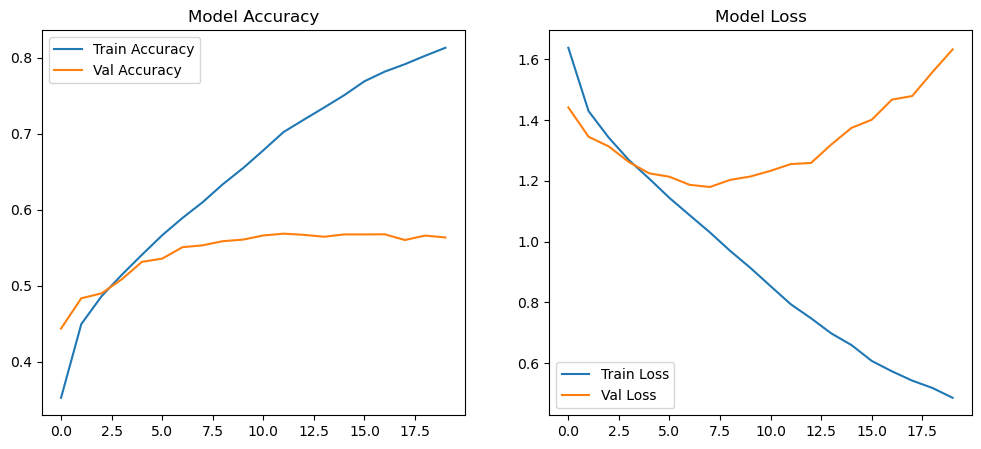

In [65]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()